---
title: "Linear Regression With One Variable"
description: "Simple linear regression is a fundamental statistical method modeling the relationship between a single independent variable and a dependent variable. It identifies a best-fitting line that minimizes prediction errors, revealing trends and enabling data-driven predictions."
jupyter: python3
author: "Vraj Shah"
date: "8/16/2023"
---

### Libraries Required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Some Plotting Fxn

In [2]:
def plt_house_x(X, y, f_wb=None, ax=None):
    ax.scatter(X, y, marker='x', c='r', label="Actual Value")
    ax.set_ylabel("Y-data")
    ax.set_xlabel("X-data")
    ax.plot(X, f_wb, label="Our Prediction")
    ax.legend()


def mk_cost_lines(x, y, w, b, ax):
    label = 'Cost of point'
    addedbreak = False
    for p in zip(x, y):
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1], f_wb_p, lw=3, ls='dotted', label=label)
        label = ''
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',
                    xytext=(5, 0), textcoords='offset points')


def plt_stationary(x_train, y_train, w0, b):
    fig, ax = plt.subplots(1, 2, figsize=(9, 8))
    fig.canvas.toolbar_position = 'top'

    w_range = np.array([200-300., 200+300])
    b_range = np.array([50-300., 50+300])
    b_space = np.linspace(*b_range, 100)
    w_space = np.linspace(*w_range, 100)

    tmp_b, tmp_w = np.meshgrid(b_space, w_space)
    z = np.zeros_like(tmp_b)
    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]):
            z[i, j] = cost_fxn(x_train, y_train, tmp_w[i][j], tmp_b[i][j])
            if z[i, j] == 0:
                z[i, j] = 1e-6

    f_wb = np.dot(x_train, w0) + b
    mk_cost_lines(x_train, y_train, w0, b, ax[0])
    plt_house_x(x_train, y_train, f_wb=f_wb, ax=ax[0])

    CS = ax[1].contour(tmp_w, tmp_b, np.log(z), levels=12,
                       linewidths=2, alpha=0.7)
    ax[1].set_title('Cost(w,b) [Contour Plot]')
    ax[1].set_xlabel('w', fontsize=10)
    ax[1].set_ylabel('b', fontsize=10)
    ax[1].set_xlim(w_range)
    ax[1].set_ylim(b_range)
    cscat = ax[1].scatter(w0, b, s=100, zorder=10,)
    chline = ax[1].hlines(b, ax[1].get_xlim()[0], w0,
                          lw=4, ls='dotted')
    cvline = ax[1].vlines(w0, ax[1].get_ylim()[0], b,
                          lw=4, ls='dotted')
    fig.tight_layout()
    return fig, ax, [cscat, chline, cvline]


def soup_bowl(x_train, y_train, w0=200, b0=-100):
    fig = plt.figure(figsize=(10, 10))

    # Plot configuration
    ax = fig.add_subplot(111, projection='3d')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_rotate_label(False)
    ax.view_init(30, -30)

    w = np.linspace(-100, 300, 100)
    b = np.linspace(-200, 300, 100)

    z = np.zeros((len(w), len(b)))
    for i in range(len(w)):
        for j in range(len(b)):
            z[i, j] = cost_fxn(x_train, y_train, w[i], b[j])

    W, B = np.meshgrid(w, b)

    ax.plot_surface(W, B, z, cmap="Spectral_r", alpha=0.7, antialiased=False)
    ax.plot_wireframe(W, B, z, color='k', alpha=0.1)
    ax.set_xlabel("$w$")
    ax.set_ylabel("$b$")
    ax.set_zlabel("$J(w,b)$", rotation=90)
    ax.set_title("$J(w,b)$", size=15)
    cscat = ax.scatter(w0, b0, s=100, color='red')

    plt.show()

### Dataset

In [3]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])
w = 200
b = -100

### Finding Function f_wb

$$
f_{w,b}(x^{(i)}) = wx^{(i)} + b 
$$

In [4]:
def fxn(x, w, b):
    f_wb = w * x + b
    
    return f_wb

### Finding Cost Function

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [5]:
def cost_fxn(x, y, w, b):
    m = x.shape[0]

    f_wb = fxn(x,w,b)
    cost = (f_wb - y) ** 2
    total_cost = (1 / (2 * m)) * np.sum(cost)

    return total_cost

#### Some Plots

#### Original w, b

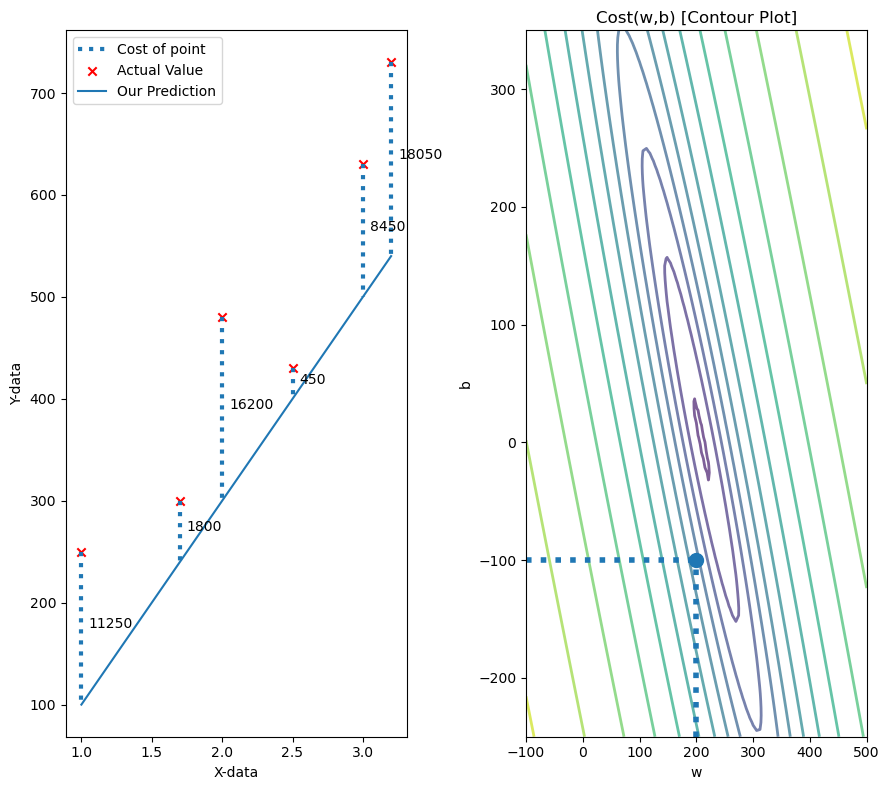

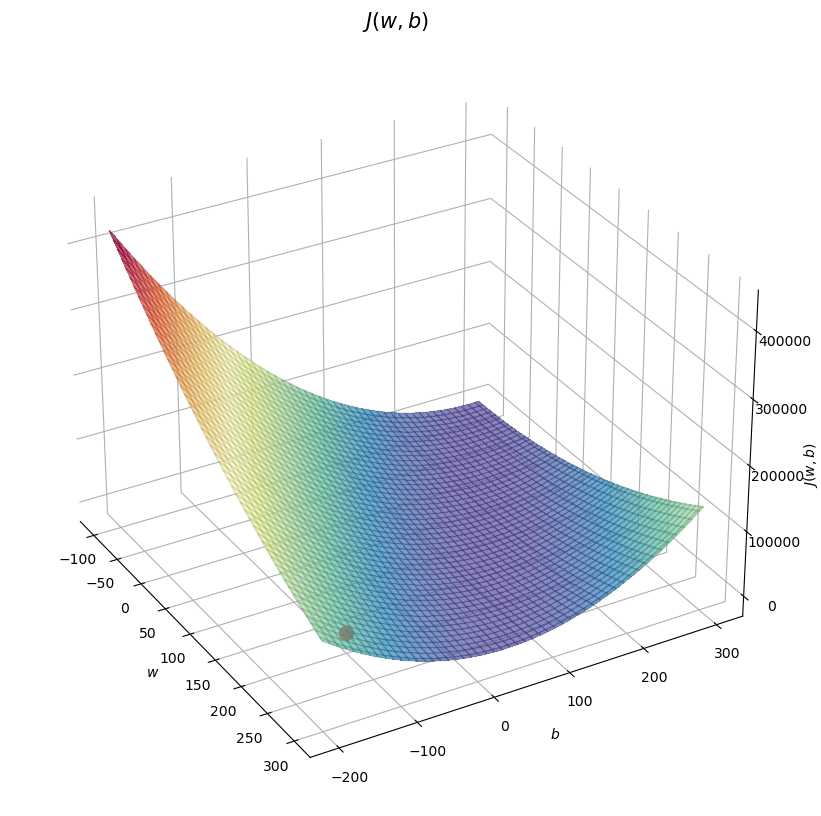

In [6]:
fig, ax, dyn_items = plt_stationary(x_train, y_train, w, b)
soup_bowl(x_train, y_train, w, b)

### Finding dJ/dw and dJ/db

$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
$$


In [7]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    a = fxn(x, w, b) - y
    dj_dw = (np.dot(a, x))/m
    dj_db = np.sum(a)/m
    return dj_dw, dj_db

### Gradient Descent

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

Iteration    0: Cost 8.46e+03, w: 202.80833333333334, b: -98.76666666666667
Iteration 1000: Cost 1.80e+03, w: 223.52137552092964, b: -32.28296188836681
Iteration 2000: Cost 1.75e+03, w: 215.18089273879156, b: -11.838434218472974
Iteration 3000: Cost 1.74e+03, w: 211.75363820423198, b: -3.4374097221896087
Iteration 4000: Cost 1.74e+03, w: 210.3453176127893, b: 0.014722492685807966
Iteration 5000: Cost 1.74e+03, w: 209.76661332681294, b: 1.4332657708600276
Iteration 6000: Cost 1.74e+03, w: 209.5288133168987, b: 2.0161707428604965
Iteration 7000: Cost 1.74e+03, w: 209.43109701154987, b: 2.255696890289678
Iteration 8000: Cost 1.74e+03, w: 209.39094362242898, b: 2.3541224966202314
Iteration 9000: Cost 1.74e+03, w: 209.37444387193037, b: 2.394567350284724
Iteration 10000: Cost 1.74e+03, w: 209.3676638273943, b: 2.4111868688115714
(w,b) found by gradient descent: 209.3676638273943,2.4111868688115714
Cost is 1735.8832116012204


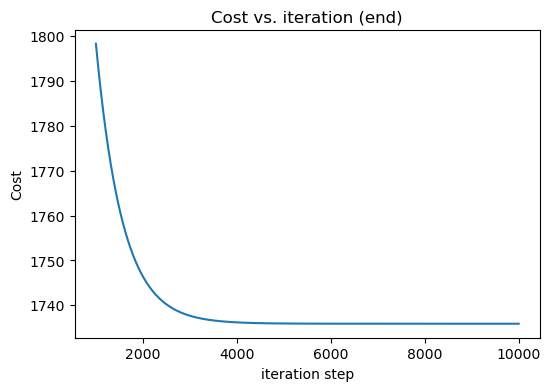

In [8]:
def gradient_descent(x, y, w, b, alpha, num_iters):
    J_history = []
    p_history = []

    for i in range(num_iters + 1):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost = cost_fxn(x, y, w, b)
        J_history.append(cost)
        p_history.append((w, b))

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {cost:.2e}, w: {w}, b: {b}")

    return w, b, J_history, p_history


iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w, b, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: {w_final},{b_final}")


f_wb = fxn(x_train, w_final, b_final)
print("Cost is", cost_fxn(x_train, y_train, w_final, b_final))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax.set_title("Cost vs. iteration (end)")
ax.set_ylabel('Cost')
ax.set_xlabel('iteration step')
plt.show()

#### Some Plots

#### Final w, b

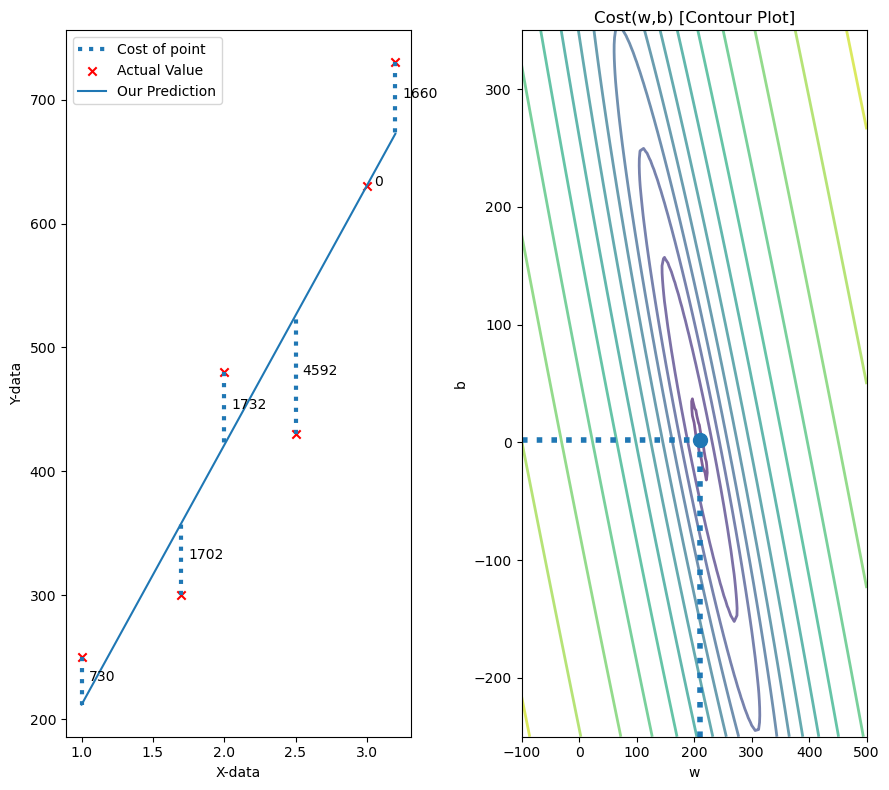

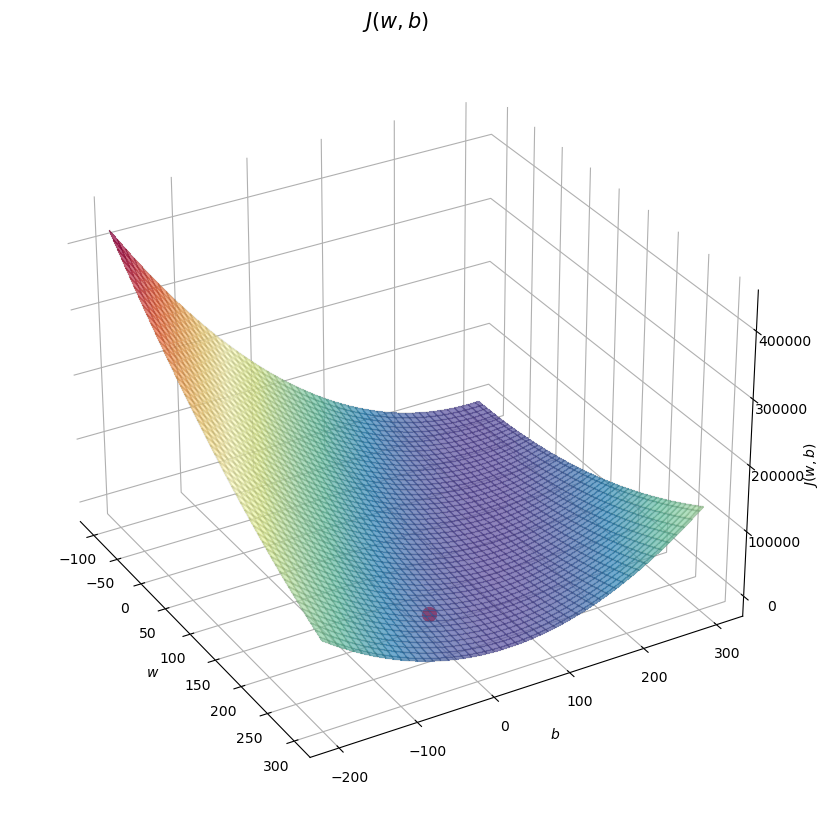

In [9]:
fig, ax, dyn_items = plt_stationary(x_train, y_train, w_final, b_final)
soup_bowl(x_train, y_train, w_final, b_final)

### Regularized Linear Regression


#### Finding Cost Fxn

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 $$ 

In [10]:
def cost_fxn_regularized(X, y, w, b, lambda_ = 1):
    cost=cost_fxn(X, y, w, b)
    cost += np.sum(w ** 2)
    return cost

#### Finding dJ/dw and dJ/db

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align*}$$


In [11]:
def compute_gradient_regularized(X, y, w, b, lambda_):
    m = X.shape[0]
    dj_dw, dj_db = compute_gradient(X, y, w, b)

    dj_dw += (lambda_ / m) * w

    return dj_db, dj_dw